In [238]:
%load_ext autoreload
%autoreload 2
import deepfly
from deepfly.CameraNetwork import CameraNetwork
import logging
import glob
import matplotlib.pyplot as plt
logging.getLogger().setLevel(logging.DEBUG)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [355]:
image_folder = '/mnt/NAS/FA/201002_G23xU1/Fly1/001_coronal/behData/images/'
output_folder = image_folder + 'df3d_test/'
pose_result_path = glob.glob(output_folder + 'pose_result*')[0]
camNet = CameraNetwork(image_folder=image_folder, output_folder=output_folder)
camNet.triangulate()

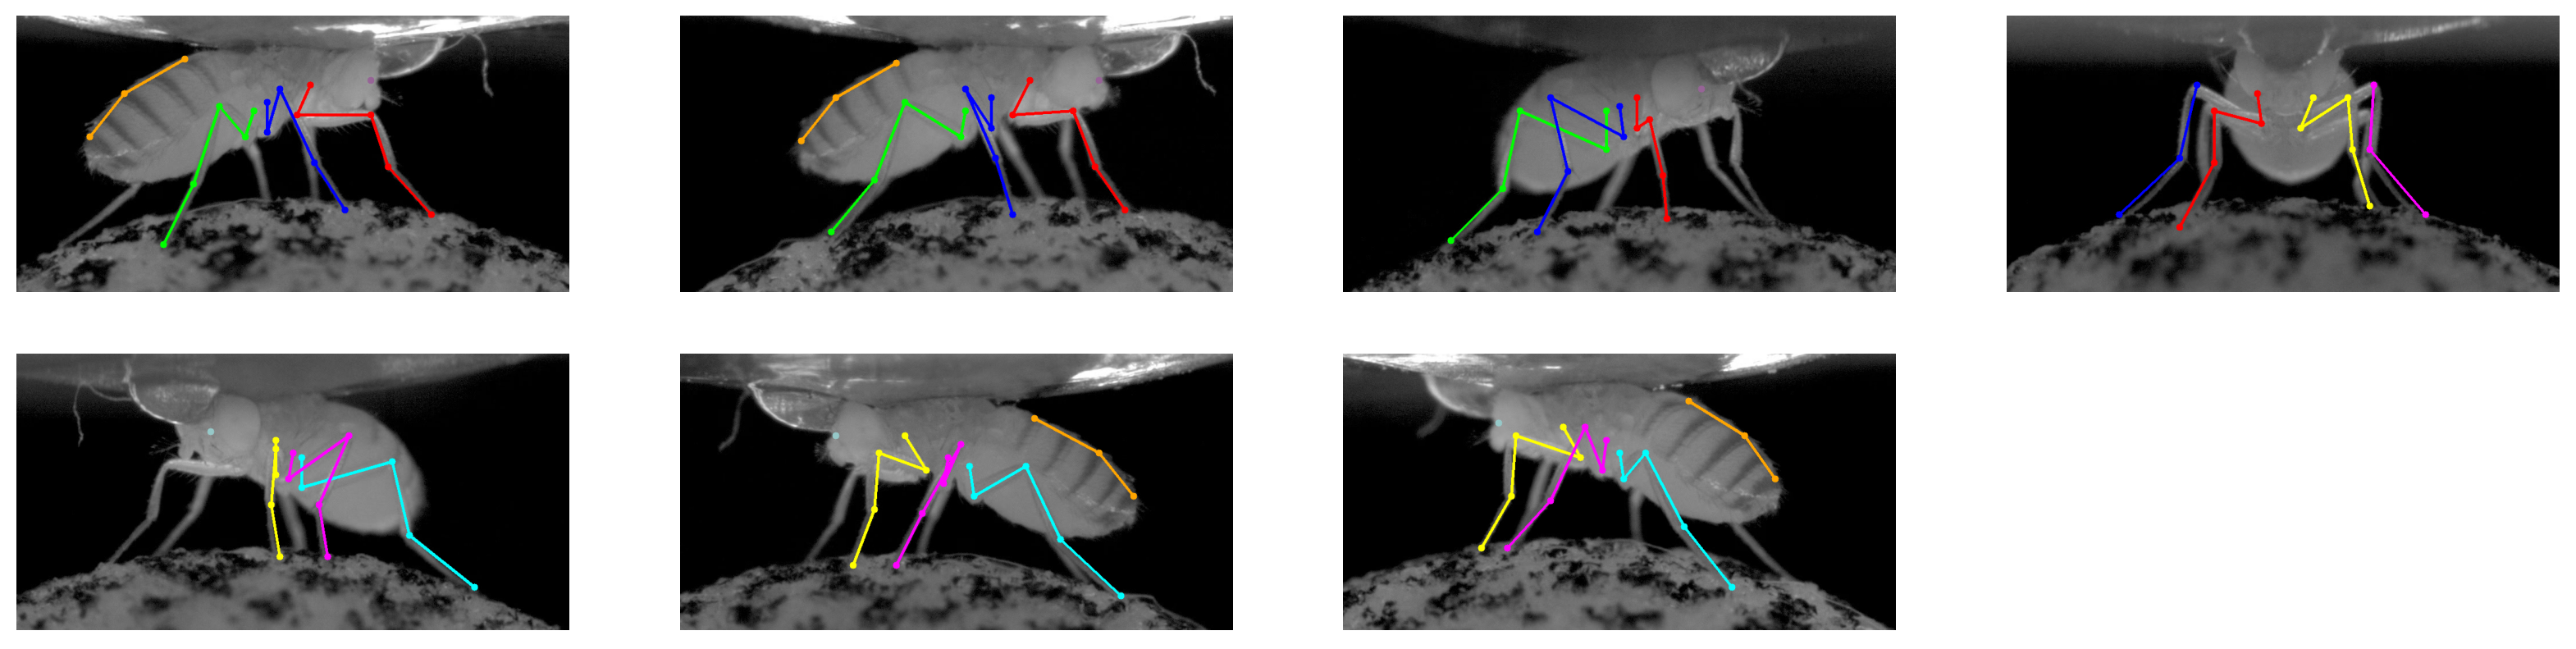

In [360]:
%matplotlib inline
import numpy as np
img_id = 20
fig, axs = plt.subplots(2,4, dpi=200, figsize=(20, 5))
axs = np.array(axs).flatten()
for ax in axs:
    ax.axis('off')
for idx, i in enumerate([0,1,2,3,4,5,6]):
    axs[idx].imshow(camNet[i].plot_2d(img_id))

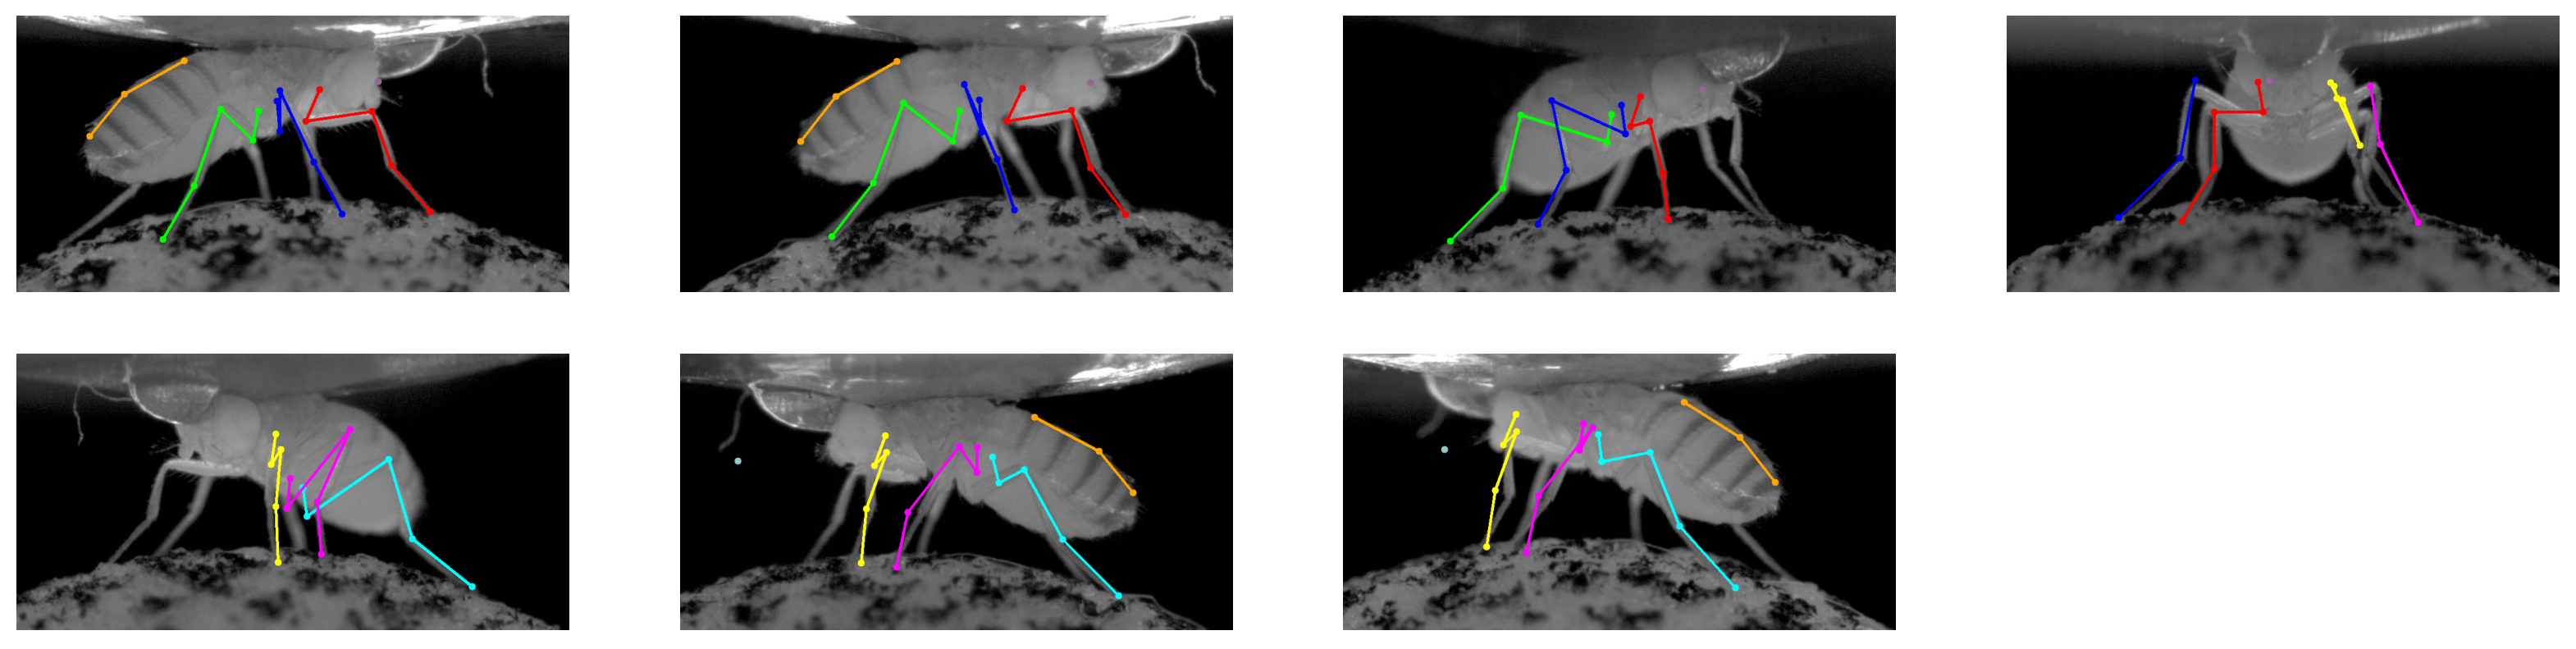

In [361]:
%matplotlib inline
import numpy as np
img_id = 10
fig, axs = plt.subplots(2,4, dpi=200, figsize=(20, 5))
axs = np.array(axs).flatten()
for ax in axs:
    ax.axis('off')
for idx, i in enumerate([0,1,2,3,4,5,6]):
    axs[idx].imshow(camNet[i].plot_2d(img_id,pts=camNet[i].project(camNet.points3d[img_id])))

In [353]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
from deepfly.plot_util import normalize_pose_3d, plot_drosophila_3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#points3d = pickle.load(open(pose_result_path, 'rb'))["points3d_wo_procrustes"]

pts3d = normalize_pose_3d(camNet.points3d.copy(), rotate=True)
plot_drosophila_3d(ax, pts3d[0], 1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …